In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Define the ensemble

In the following set of exercise, you'll work with the Indian Liver Patient Dataset from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

#### Evaluate individual classifiers

In this exercise you'll evaluate the performance of the models in the list classifiers (LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier). You'll do so by fitting each classifier on the training set and evaluating its test set accuracy. Split The dataset into 70% train and 30% test. 

#### Better performance with a Voting Classifier

Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

In [2]:
df = pd.read_csv("indian_liver_patient_preprocessed.csv")

In [3]:
df.head()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [4]:
df.shape

(579, 12)

In [5]:
X = df.drop(["Liver_disease", 'Unnamed: 0'], axis =1)

In [6]:
y = df["Liver_disease"]

In [7]:
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [10]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [11]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.767
K Nearest Neighbours : 0.664
Classification Tree : 0.638


In [12]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.707


the voting classifier achieves a test set accuracy of 77%. This value is greater than that achieved by LogisticRegression.

In [13]:
# List of (string, estimator) tuples
estimators = [("lr", lr),("dt", dt), ("knn", knn)]

# Build and fit an averaging classifier
clf_avg = VotingClassifier(estimators = estimators, voting = "soft", weights=[3, 2, 1])
clf_avg.fit(X_train, y_train)

# Evaluate the performance of both models
acc_avg = accuracy_score(y_test,  clf_avg.predict(X_test))
print('Voting: {:.2f}, Averaging: {:.2f}'.format(accuracy, acc_avg))

Voting: 0.71, Averaging: 0.66


#### Bagging Classifier

In [14]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [15]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.72


In [16]:
# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50,oob_score=True, random_state=1)

In [17]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

In [18]:
# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.716, OOB accuracy: 0.708


In [19]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [20]:
# Define params_dt
params_dt = {"max_depth":[3,4,5,6,7,8], 'max_features': [0.4,0.5,0.6,0.7,0.8,0.9], 
             "min_samples_leaf": [0.001,0.005,0.01,0.05,0.07] }

In [21]:
# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring="accuracy", cv=10, n_jobs=-1)

In [22]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'min_samples_leaf': [0.001, 0.005, 0.01, 0.05, 0.07]},
             scoring='accuracy')

In [23]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 4, 'max_features': 0.7, 'min_samples_leaf': 0.07}


In [24]:
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
best_CV_score

0.7192876965772432

In [25]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

In [26]:
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.707


In [27]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 150, max_depth= 3, max_features= 0.8, min_samples_leaf= 0.12, random_state=1)
clf_rf.fit(X_train,y_train)
rf_pred = clf_rf.predict(X_test)
print('Accuracy:  {:.2f}'.format(accuracy_score(y_test, rf_pred)))

Accuracy:  0.72


In [28]:
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix, f1_score, classification_report
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [72]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=3, random_state=1)

In [73]:
# Instantiate ada
adb_clf = AdaBoostClassifier(base_estimator=dt,random_state=1)

In [74]:
# Fit ada to the training set
adb_clf.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

In [75]:
pred = best_model.predict(X_test)

# Print test set accuracy of tuned DT
print("Accuracy Score of Untuned AdaBoost:{:.3f}".format(accuracy_score(y_test, pred)*100))

# Print the confusion matrix
cm = confusion_matrix(y_test, pred)
print('Confusion matrix:\n', cm)

# Print the F1 score
score = f1_score(y_test, pred)
print('F1-Score: {:.3f}'.format(score))

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

target_names=['N','Y']
print(classification_report(y_test,pred,target_names=target_names))

Accuracy Score of Untuned AdaBoost:69.828
Confusion matrix:
 [[13 21]
 [14 68]]
F1-Score: 0.795
ROC AUC score: 0.67
              precision    recall  f1-score   support

           N       0.48      0.38      0.43        34
           Y       0.76      0.83      0.80        82

    accuracy                           0.70       116
   macro avg       0.62      0.61      0.61       116
weighted avg       0.68      0.70      0.69       116



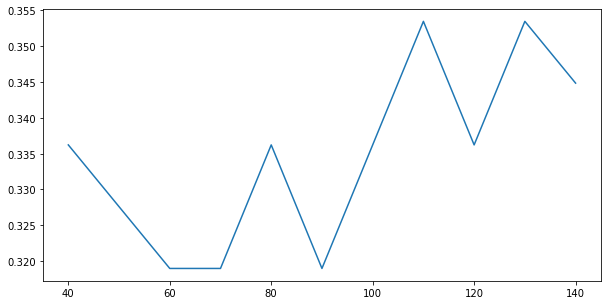

In [76]:
error_rate = []

for n in range(40,150,10):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, prediction)
    error_rate.append(err)

plt.figure(figsize=(10,5))
plt.plot(range(40,150,10), error_rate)

In [113]:
# Define the grid of hyperparameters 'params_dt'
params_ad = {'n_estimators': list(range(65,80)) , "learning_rate": [0.007,0.08,0.09,0.1]}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_ad = GridSearchCV(estimator=adb_clf, param_grid=params_ad, scoring='accuracy', cv=10, n_jobs=-1)

In [114]:
# Fit 'grid_dt' to the training data
grid_ad.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                random_state=1),
                                          random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.007, 0.08, 0.09, 0.1],
                         'n_estimators': [65, 66, 67, 68, 69, 70, 71, 72, 73,
                                          74, 75, 76, 77, 78, 79]},
             scoring='accuracy')

In [115]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_ad.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_ad.best_score_
print('Best CV accuracy'.format(best_CV_score))

# Extract best model from 'grid_dt'
best_model = grid_ad.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

# Print test set accuracy of tuned DT
print("Accuracy Score of Untuned AdaBoost:{:.3f}".format(accuracy_score(y_test, pred)*100))

# Print test set accuracy of tuned DT
print("Accuracy Score of Tuned AdaBoost:{:.3f}".format(test_acc*100))

Best hyerparameters:
 {'learning_rate': 0.007, 'n_estimators': 67}
Best CV accuracy
Accuracy Score of Untuned AdaBoost:69.828
Accuracy Score of Tuned AdaBoost:72.414


In [116]:
# Predict the test set probabilities of positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
best_model_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.3f}'.format(best_model_roc_auc_score))

ROC AUC score: 0.730
